In [97]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.activations import relu6
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [98]:
xtrain=np.load("/content/test_sign.npy")
xtrain,xtest= train_test_split(xtrain, test_size=0.1)

In [99]:
print(xtrain)
print(xtest)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0

In [100]:
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.

In [101]:
#xtrain=xtrain.reshape((len(xtrain),28*28))
#xtest=xtest.reshape((len(xtest),28*28))

In [102]:
inputdim=(128,128,1)

In [103]:
codedim=3

In [104]:
inputvec=Input(shape=inputdim)

In [105]:
enc1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputvec)
enc2 = MaxPooling2D((2, 2), padding='same')(enc1)
enc3 = Conv2D(64, (3, 3), activation='relu', padding='same')(enc2)
enc4 = MaxPooling2D((2, 2), padding='same')(enc3)
encoded = Conv2D(128, (3, 3), activation='tanh', padding='same')(enc4)




In [106]:
#encode=Dense(codedim,activation='tanh') (enc3)

In [107]:
dc1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
dc2 = UpSampling2D((2, 2))(dc1)
dc3 = Conv2D(32, (3, 3), activation='relu', padding='same')(dc2)
dc4 = UpSampling2D((2, 2))(dc3)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dc4)

In [108]:
latentvec=Model(inputvec,encoded)
autoencoder=Model(inputvec,decoded)

In [109]:
print(autoencoder.summary())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_10 (UpSampling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_11 (UpSampling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [110]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [111]:
hist=autoencoder.fit(xtrain,xtrain,epochs=2,batch_size=100,shuffle=True,validation_data=(xtest,xtest),callbacks=[early_stopping])

Epoch 1/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 206s 9s/step - loss: 0.5552 - val_loss: 0.2700
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 252s 8s/step - loss: 0.2735 - val_loss: 0.2517


In [112]:
encd=latentvec.predict(xtest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step


ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 1032192.

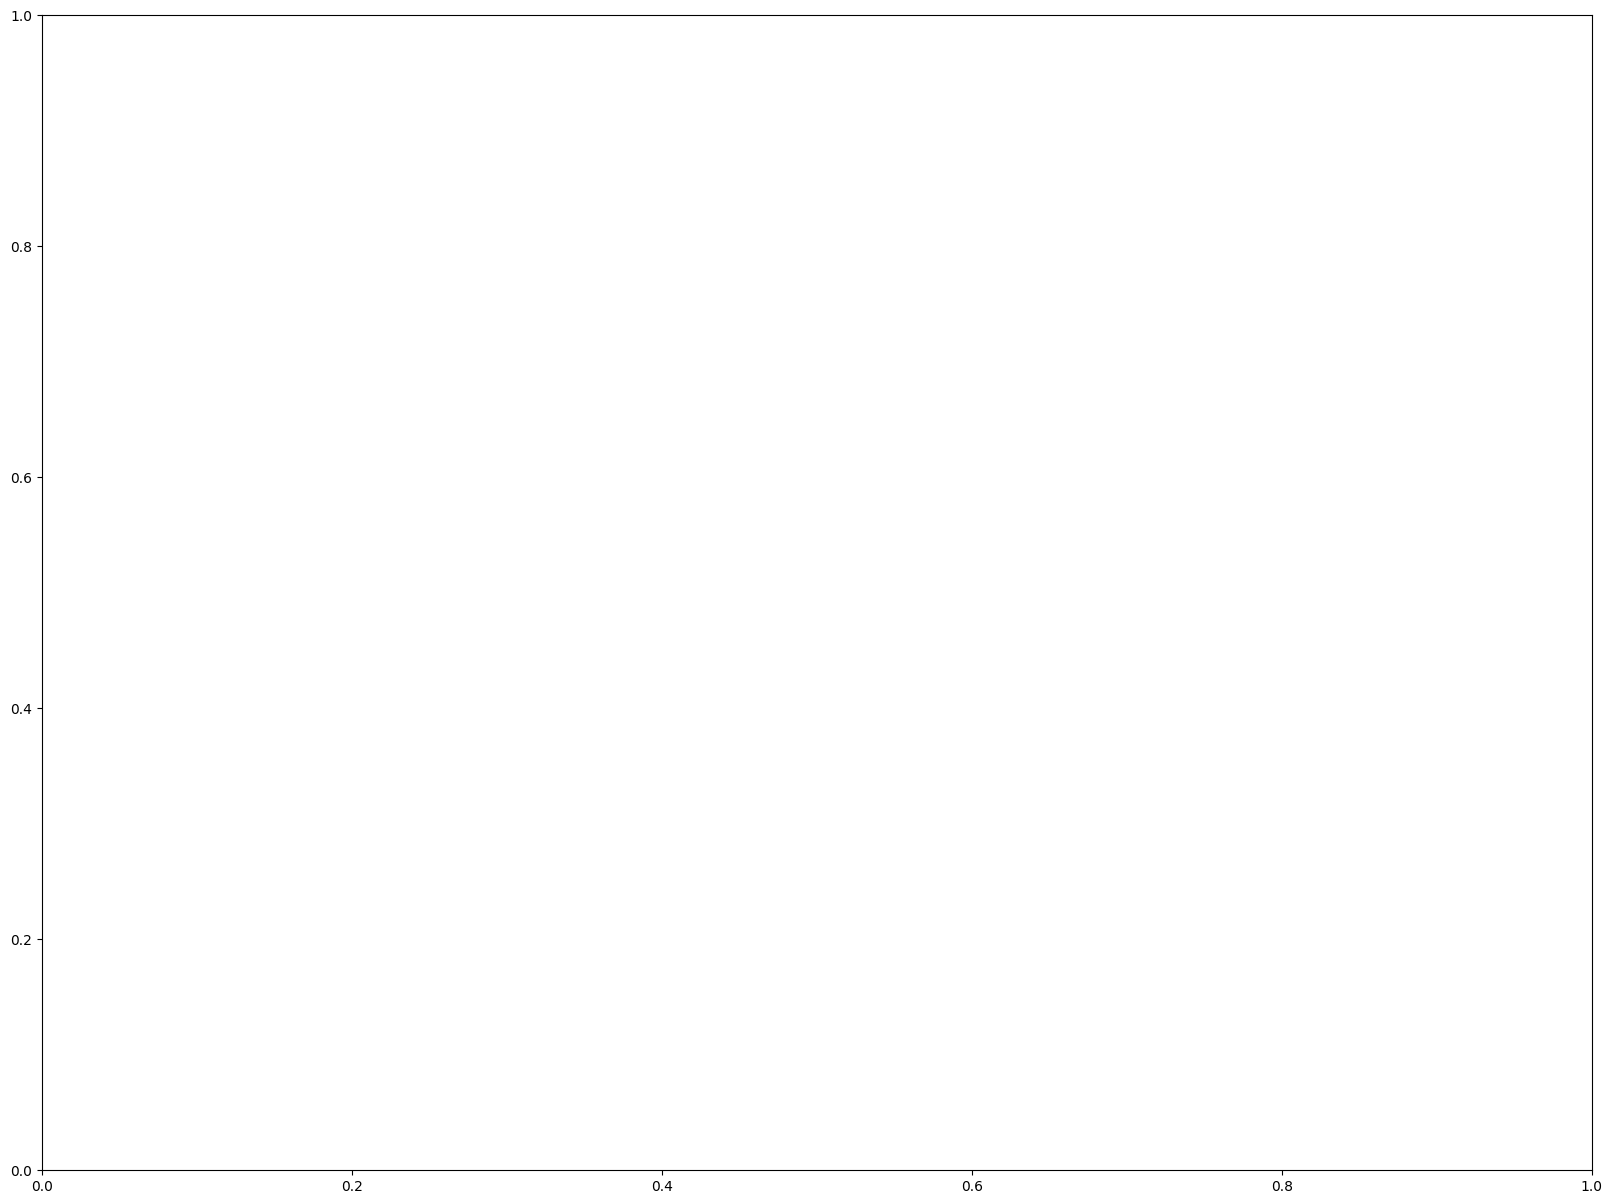

In [113]:
#Visualize latent space
fig=plt.figure(figsize=(20,15))
plt.scatter(encd[:,0],encd[:,1],20,c=ytest[:], cmap='viridis')
plt.title('Encoded Space')
plt.ylabel('Second Encoder Dimention')
plt.xlabel('First Encoder Dimention')
plt.show()

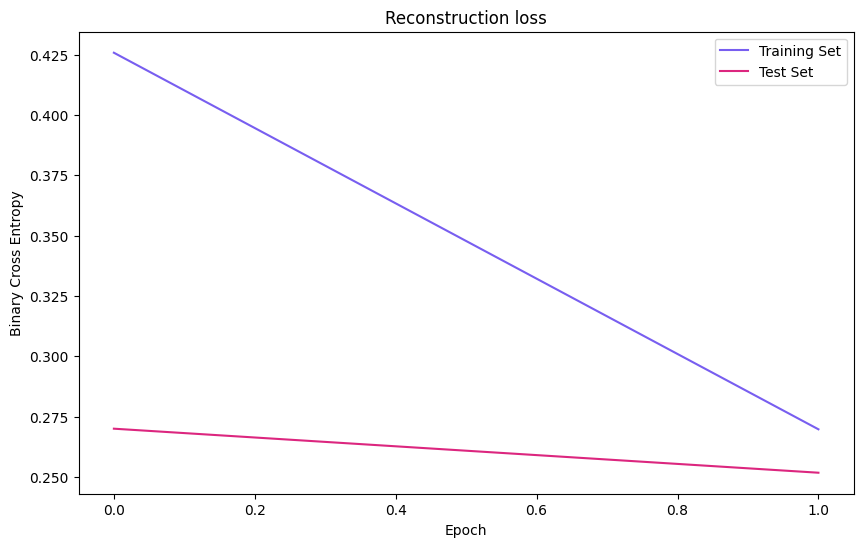

In [114]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [115]:
reconstructed=autoencoder.predict(xtest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 882ms/step


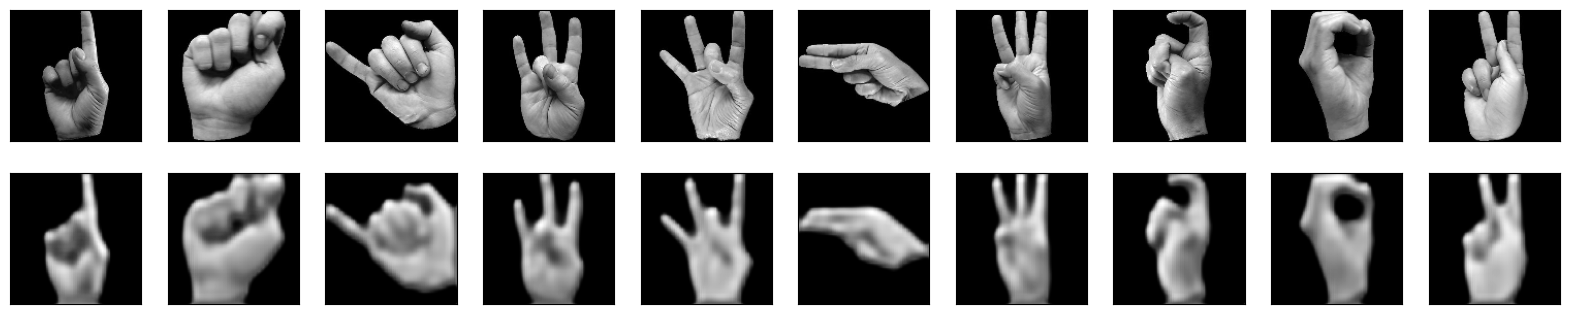

In [116]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(128, 128))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()